In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from scipy.spatial.distance import pdist, squareform, cityblock
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

In [ ]:
# 1. Download data set
cancer = load_breast_cancer()

In [ ]:
# 2. Create DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
# 3. Output the information about data of DataFrame
print('The information about Data Set')
df.info()

# 4. Output descriptive statistics
print('\n Descriptive statistics')
print(df.describe())

The information about Data Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64


In [ ]:
# 5. Standartisation of data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

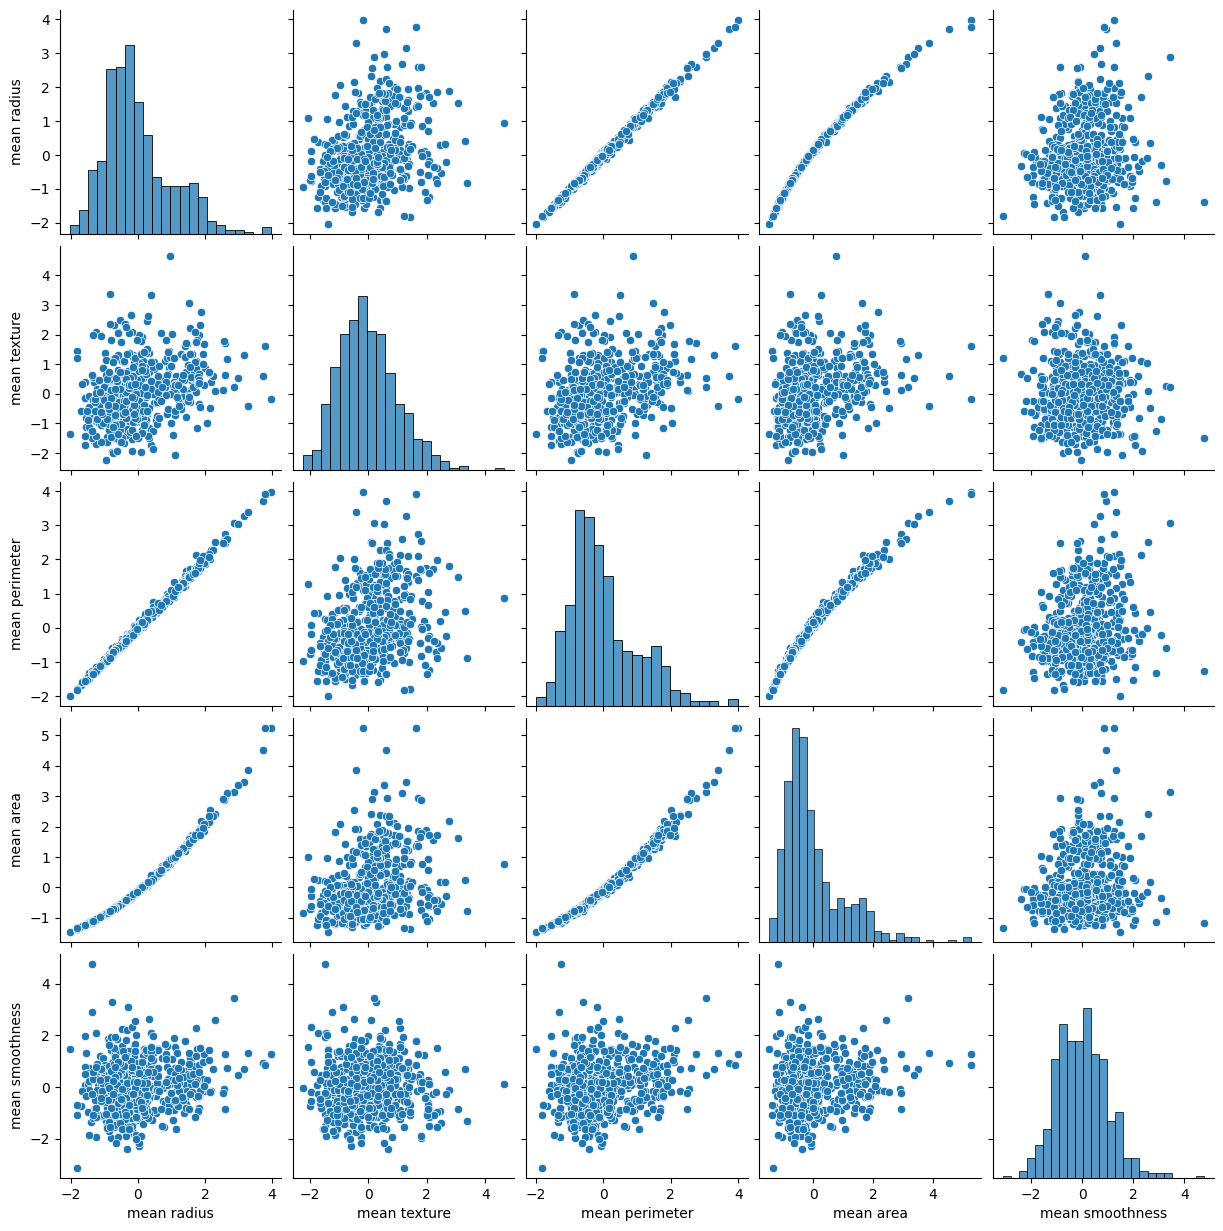

In [ ]:
# 6. Building points Diagrams
sns.pairplot(df_scaled.iloc[:, :5]) # Building for first five descriptions
plt.show()

In [ ]:
# 7. Calculate the distance metrics
distance_metrics = ['cityblock', 'cosine', 'euclidean']
distance_matrices = {metric: squareform(pdist(df_scaled, metric=metric)) for metric in distance_metrics}

manhattan_distance = cityblock(df_scaled.iloc[0], df_scaled.iloc[1])
print("\nManhatten distance between first and second examples", manhattan_distance)



Manhatten distance between first and second examples 48.30016071007345


Minimum distance: 0.011278013006398142
Maximum distance: 23.738780000825212
Mean distance: 5.164698136079683
Standard deviation: 3.3672873294948316


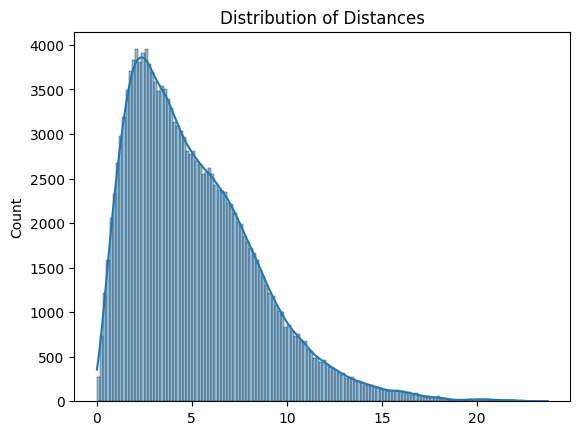

In [ ]:
# Checking the distance distribution
all_distances = pdist(df_pca, metric='euclidean')
print(f"Minimum distance: {np.min(all_distances)}")
print(f"Maximum distance: {np.max(all_distances)}")
print(f"Mean distance: {np.mean(all_distances)}")
print(f"Standard deviation: {np.std(all_distances)}")

sns.histplot(all_distances, kde=True)
plt.title('Distribution of Distances')
plt.show()

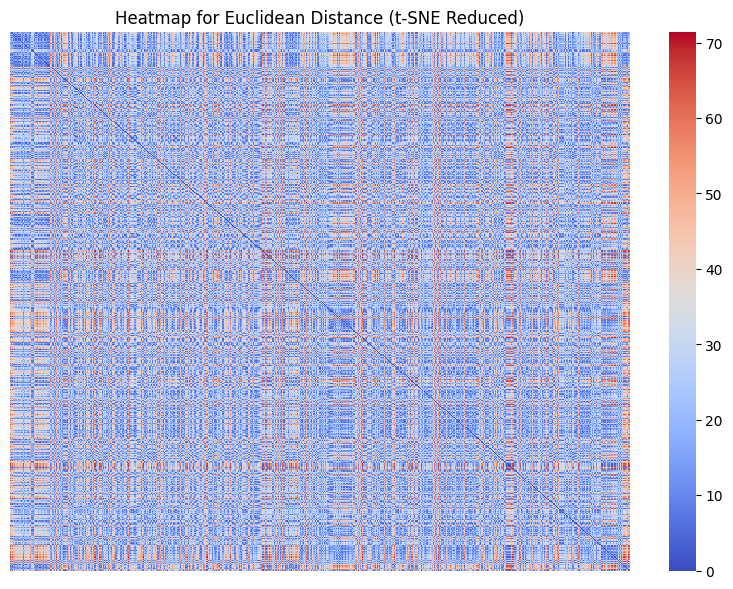

In [ ]:
# We use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Calculating distances for t-SNE results
distance_matrix_tsne = squareform(pdist(df_tsne, metric='euclidean'))

# Heatmap visualization for t-SNE
plt.figure(figsize=(10, 7))
sns.heatmap(distance_matrix_tsne, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Heatmap for Euclidean Distance (t-SNE Reduced)')
plt.show()


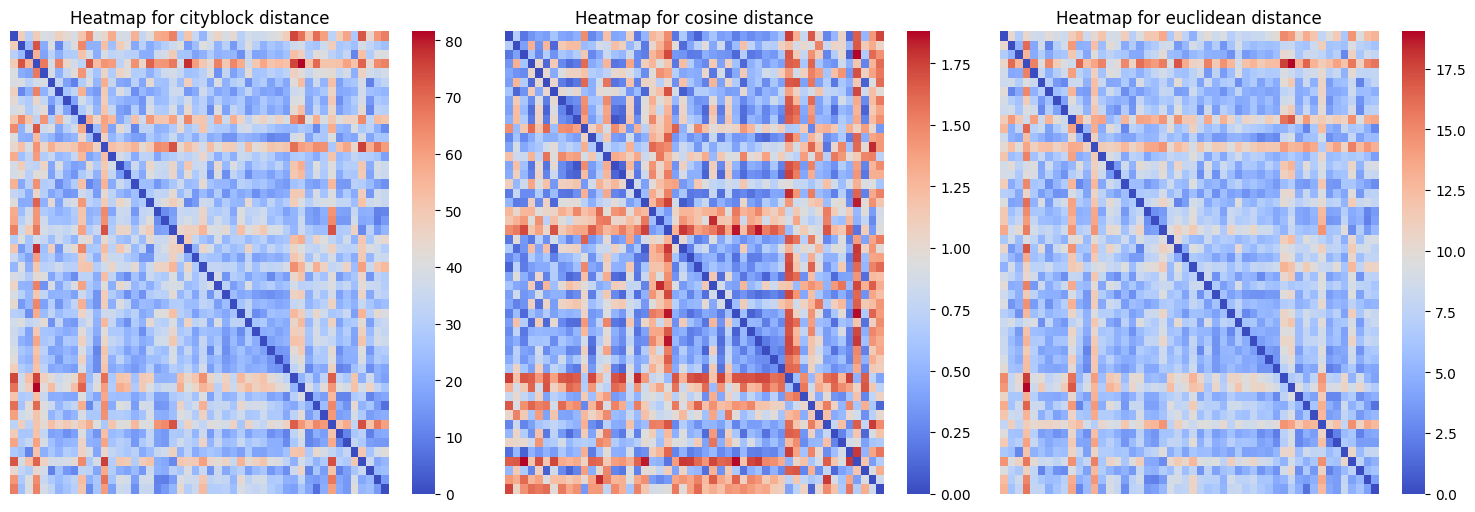

In [ ]:
# 8. Visualization distance metrix

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

distance_metrics_pca = ['euclidean', 'cityblock', 'cosine']
distance_matrices_pca = {metric: squareform(pdist(df_pca, metric=metric)) for metric in distance_metrics_pca}


plt.figure(figsize=(15, 10))
for i, (metric, matrix) in enumerate(distance_matrices.items()):
    plt.subplot(2, 3, i+1)
    size =min(50, len(matrix))
    sns.heatmap(matrix[:size, :size], cmap='coolwarm', xticklabels=False, yticklabels=False)
    plt.title(f'Heatmap for {metric} distance')
plt.tight_layout()
plt.show()

In [ ]:
# 9. Optimization and regularization
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns )

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(df_normalized, np.zeros(df_normalized.shape[0]))
print('\n L1 regularization coefficients:', lasso.coef_)



 L1 regularization coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# 10. Conclusions
print('\nConclusions')
print('Different distance metrics evaluate the similarity between samples in \
\ndifferent ways. Euclidean distance and manhattan distance have similar results, \
\nwhile cosine distance analyzes angular similarity. The best metrics depends on \
\nthe specific analysis task.')


Conclusions
Different distance metrics evaluate the similarity between samples in 
different ways. Euclidean distance and manhattan distance have similar results, 
while cosine distance analyzes angular similarity. The best metrics depends on 
the specific analysis task.
